In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [2]:
import re
from datetime import timedelta
def parse_line(filename):
    with open(filename) as f:
        file = f.read()
        
    stats_regex = "\[(?P<epoch>[0-9]+)\] - (.*) - (\d+\.\d+),(\d+\.\d+),(\d+\.\d+)"
    stats_regex = re.compile(stats_regex)
    stats_match = stats_regex.findall(file)
    
    time_regex = "\[([0-9]+)\] - (.*) - (\d\:\d+\:\d+\.\d+)"
    time_regex = re.compile(time_regex)
    times = time_regex.findall(file)
    
    stats = [(int(x[0]), x[1], float(x[2]), float(x[3]), float(x[4])) for x in stats_match]
    #time_matches = [(int(x[0]), x[1], float(x[2]), float(x[3])) for x in stats_match]
    
    train_stats = [x for x in stats if "train" in x[1]]
    train_times = [x for x in times if "train" in x[1]]
    
    eval_stats = [x for x in stats if "eval" in x[1]]
    eval_times = [x for x in times if "eval" in x[1]]

    return train_stats, train_times, eval_stats, eval_times

In [3]:
def plot_results(filename, stat: str = "loss"):
    stat_map = {"loss":2, "top1":3, "top5": 4}
    index = stat_map.get(stat,2)
    train_stats, train_times, eval_stats, eval_times= parse_line(filename)
    
    plt.plot([x[0] for x in train_stats][2:], np.convolve([x[3] for x in train_stats], np.ones(3)/3, mode='valid'))
    plt.plot([x[0] for x in eval_stats][2:], np.convolve([x[3] for x in eval_stats], np.ones(3)/3, mode='valid'))
    plt.grid(True)
    plt.title(filename)
    plt.xlabel("Epoch")
    plt.ylabel("Top1 Accuracy")
    plt.show()

In [4]:
def plt_multiple(folder):
    files= [os.path.join(root, file) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key=os.path.getmtime)
    for file in files:
        plot_results(file)

def print_results(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    data = {}
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        max_acc = max(eval_stats, key=lambda x:x[3])
        #print(f"{os.path.split(root)[-1]:<30} {max_acc[3]}")
        data[os.path.split(root)[-1]]=max_acc[3]
    return data

In [9]:
from collections import defaultdict
data = print_results("/media/barny/SSD4/MasterThesis/Data/logs")
dd = defaultdict(dict)
for d in data:
    dd[d[:-2]][d[-1]] = data[d]
dd

defaultdict(dict,
            {'default_100_100': {'0': 0.9625527426160337},
             'default_64_1': {'1': 0.7177742616033755,
              '2': 0.7003691983122363,
              '0': 0.7141877637130801},
             'default_64_2': {'1': 0.8616561181434599,
              '2': 0.8572784810126582,
              '0': 0.8610232067510548},
             'default_64_4': {'1': 0.917246835443038,
              '2': 0.9096518987341772,
              '0': 0.9103375527426161},
             'default_64_8': {'1': 0.9356540084388185,
              '2': 0.9442510548523206,
              '0': 0.944831223628692},
             'default_64_16': {'1': 0.956909282700422,
              '2': 0.9560654008438818,
              '0': 0.9552742616033755},
             'default_64_32': {'1': 0.9637130801687763,
              '2': 0.957964135021097,
              '0': 0.9572257383966245},
             'default_64_64': {'1': 0.9614451476793249,
              '2': 0.9601793248945147,
              '0': 0.95991

In [8]:
print_results("./logs/augment_test2")

{'xview_joints_none': 0.9668248945147679,
 'xview_joints_mean_spine': 0.9582278481012658,
 'xview_joints_spine': 0.9595991561181435,
 'xview_joints_screen': 0.9664029535864979,
 'xview_joints_relative': 0.9586497890295359,
 'xview_joints_spine_align': 0.9606540084388185,
 'xview_joints_mean_spine_align': 0.9607594936708861}

In [27]:
from collections import defaultdict

data = [print_results("./logs/norm_tests2"),print_results("./logs/norm_tests3")]
avg = defaultdict(list)
for d in data:
    for k,v in d.items():
        avg[k].append(v)
avg = sorted([(k,np.mean(v)) for k,v in avg.items()], key=lambda x:np.mean(x[1]))
print(avg)

[('xsub_joints_relative', 0.8606582125603865), ('xsub_joints_mean_spine', 0.8723429951690821), ('xsub_joints_spine', 0.8754830917874397), ('xsub_joints_screen', 0.88118961352657), ('xsub_joints_none', 0.8848429951690822), ('xsub_joints_mean_spine_align', 0.9030797101449275), ('xsub_joints_spine_align', 0.9042874396135265)]


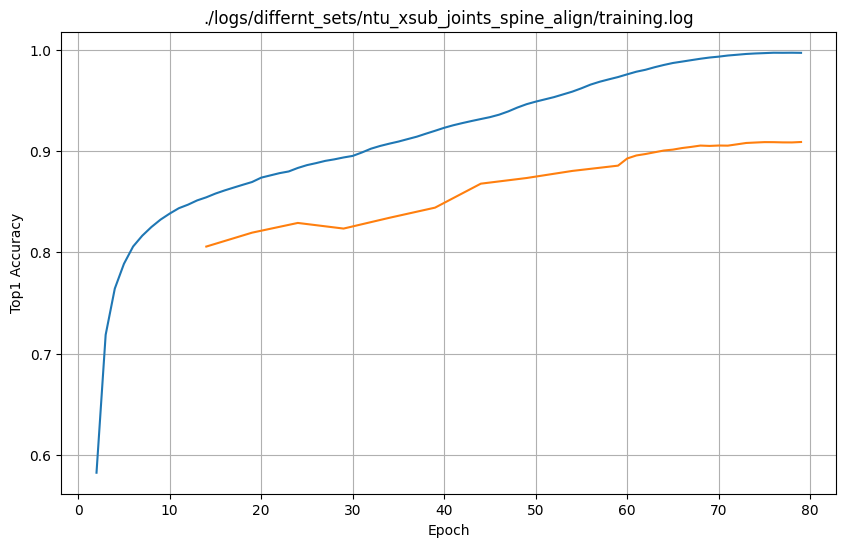

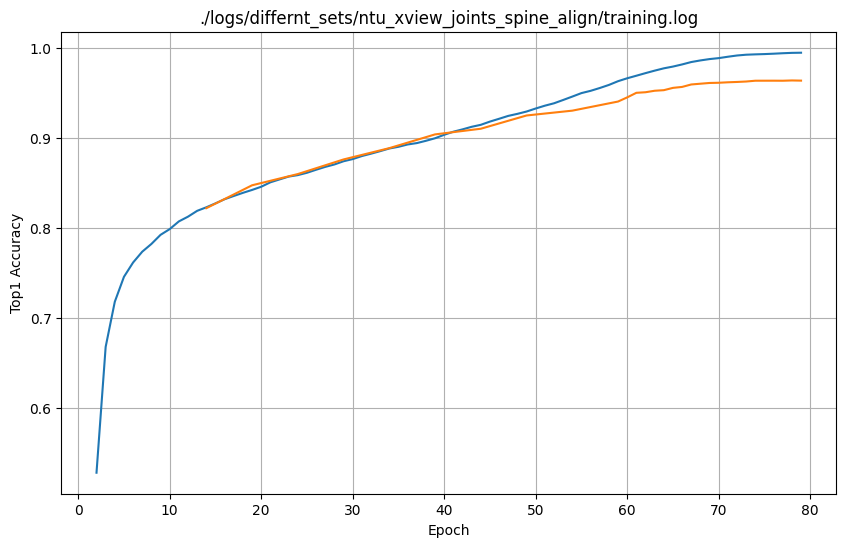

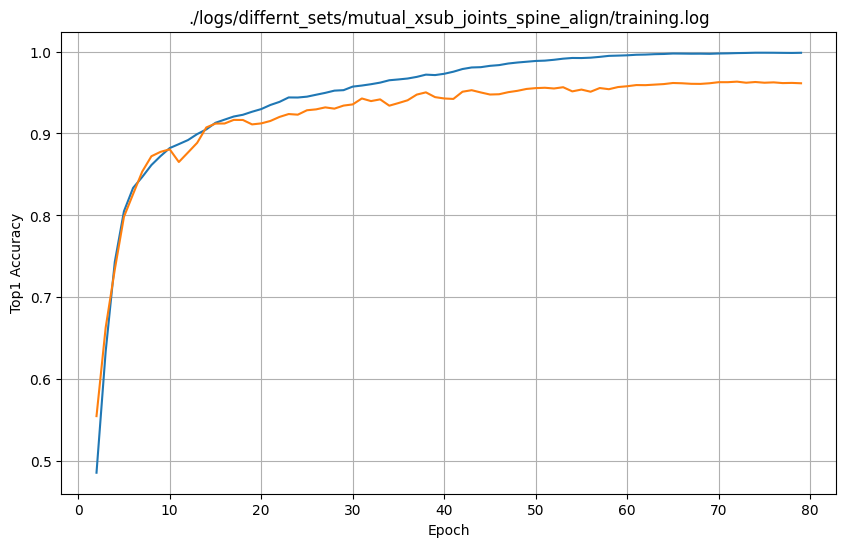

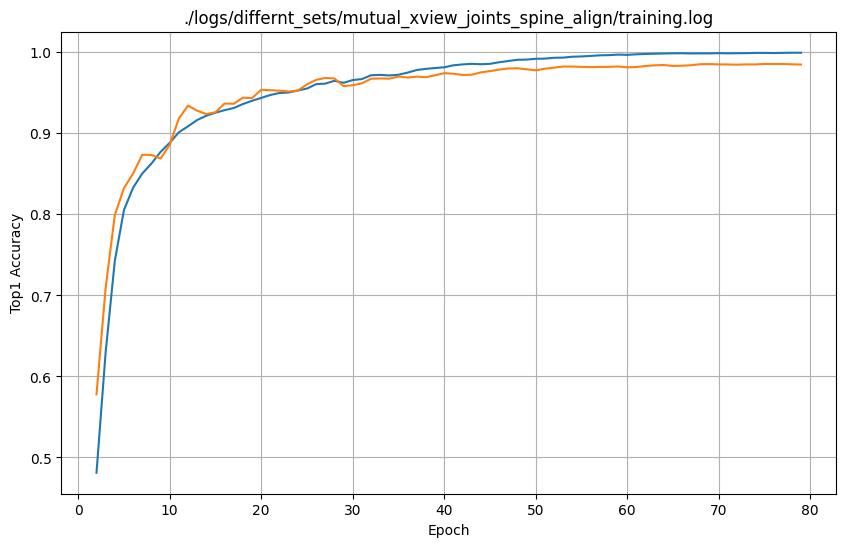

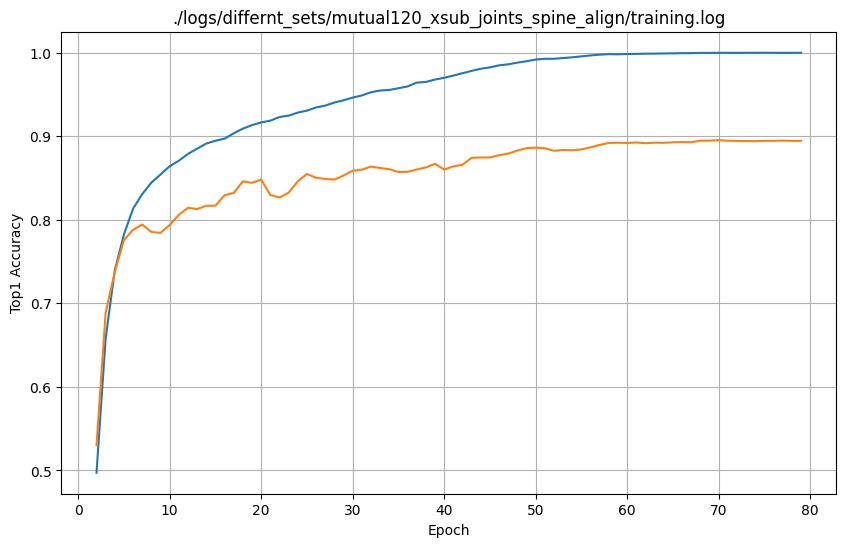

ValueError: x and y must have same first dimension, but have shapes (0,) and (2,)

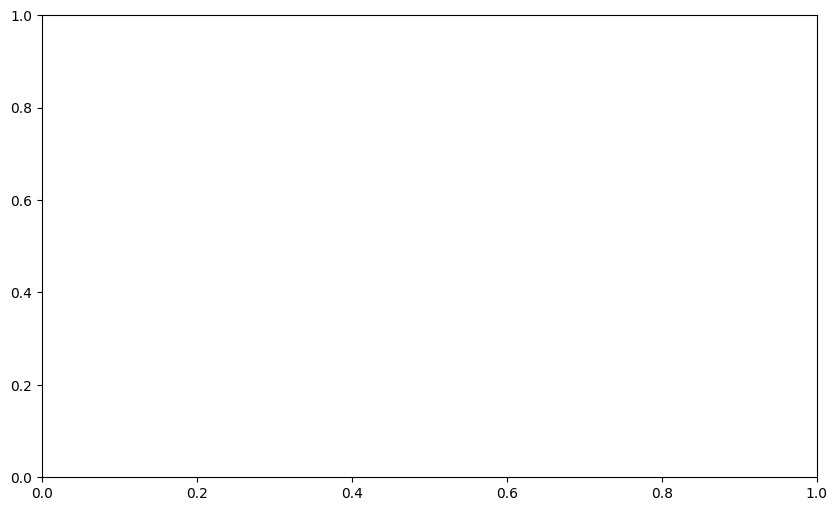

In [7]:
plt_multiple("./logs/differnt_sets")

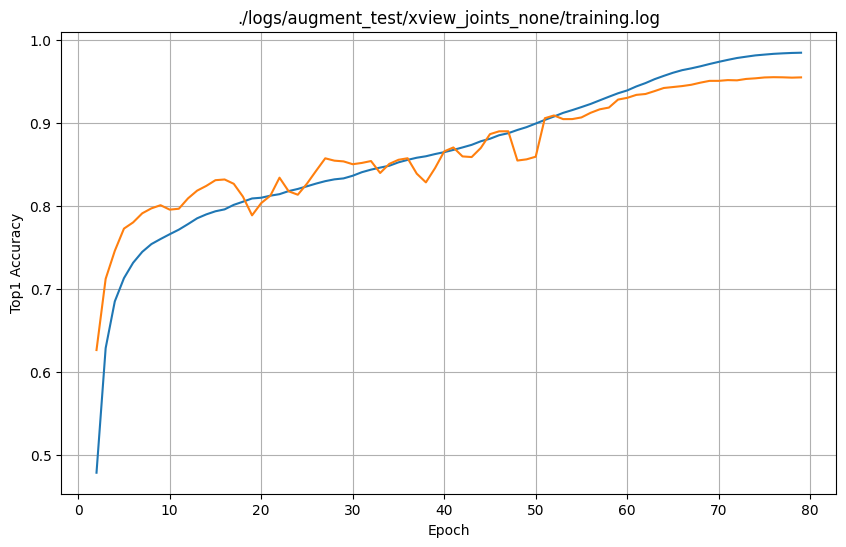

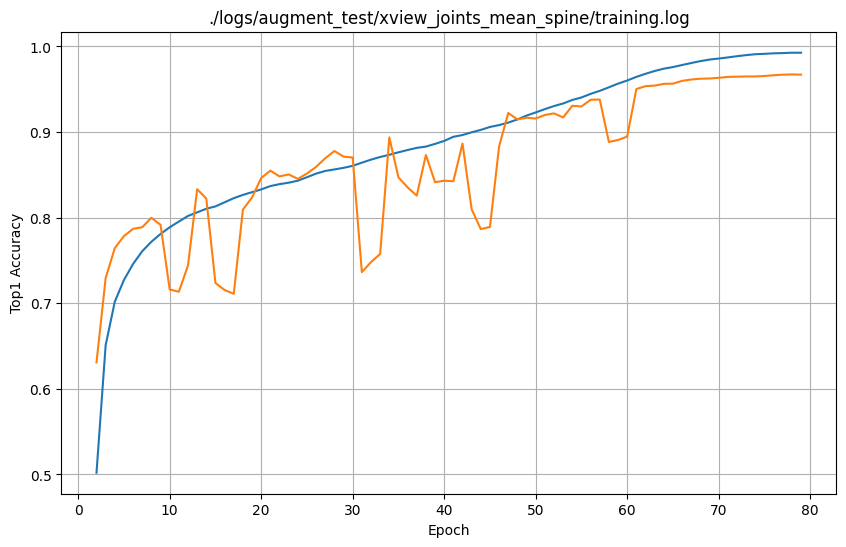

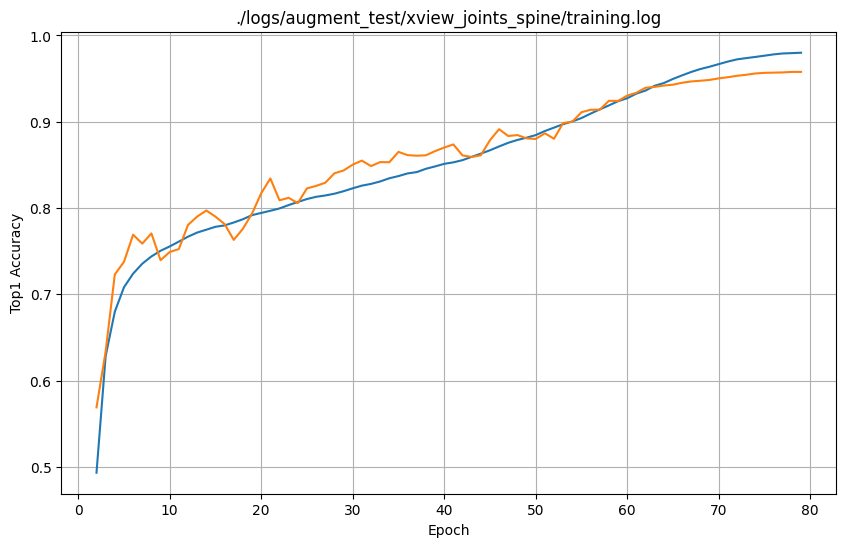

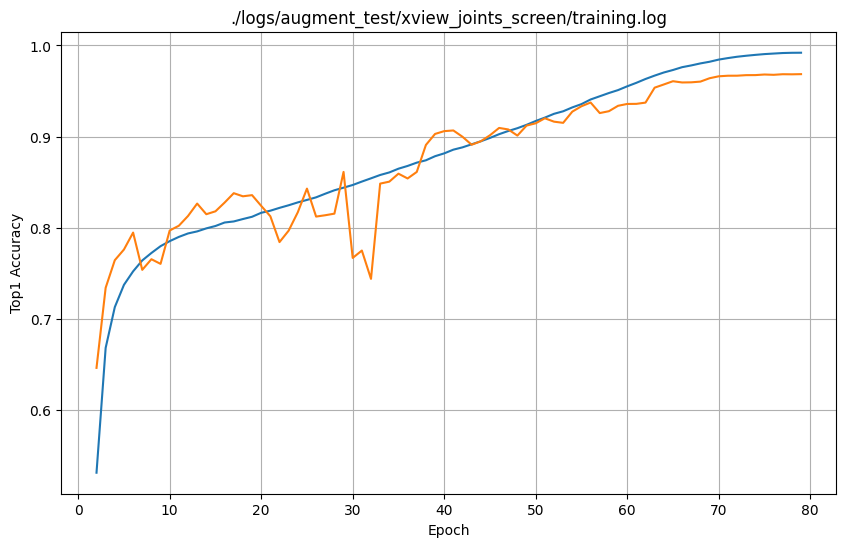

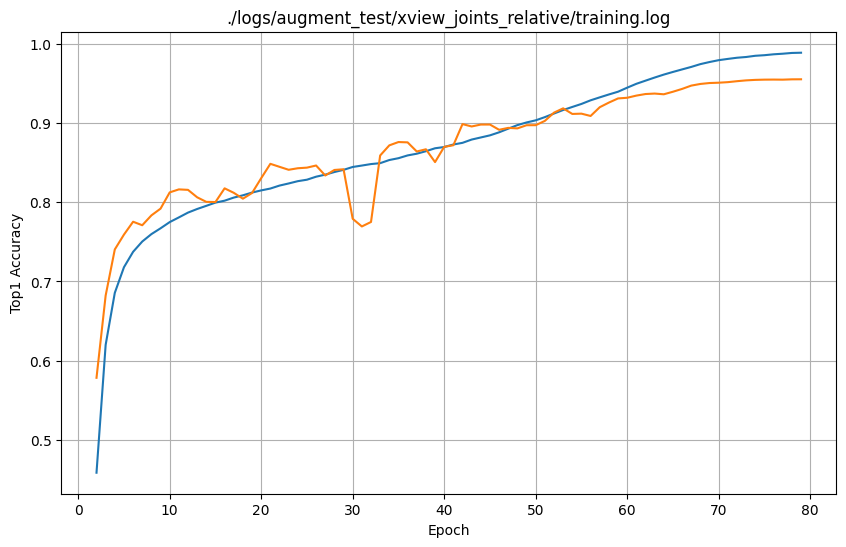

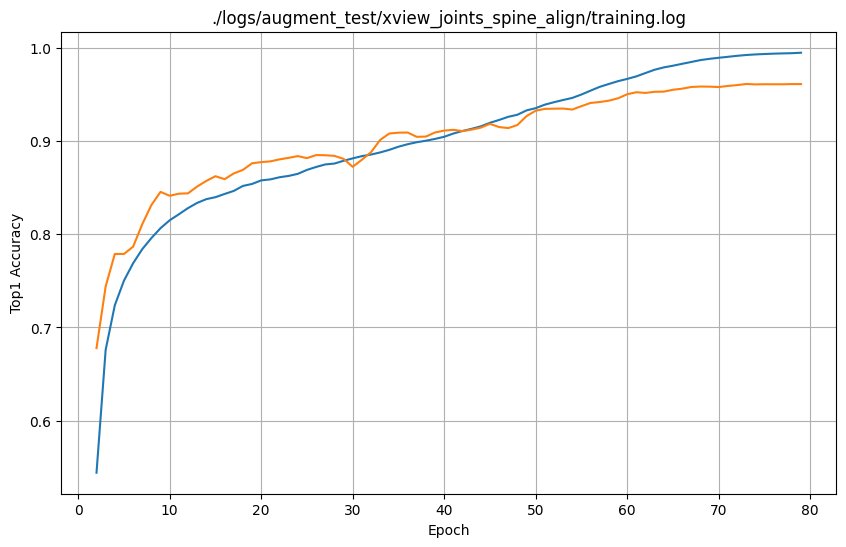

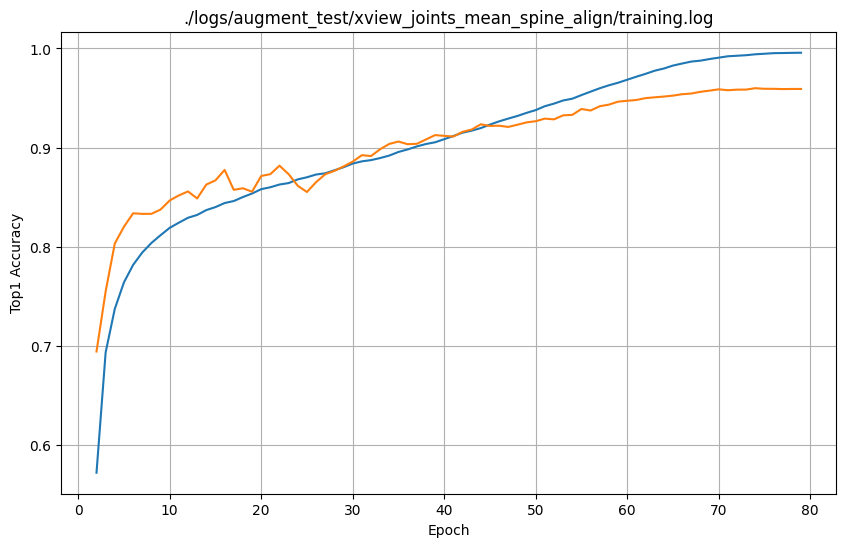

In [10]:
plt_multiple("./logs/augment_test")

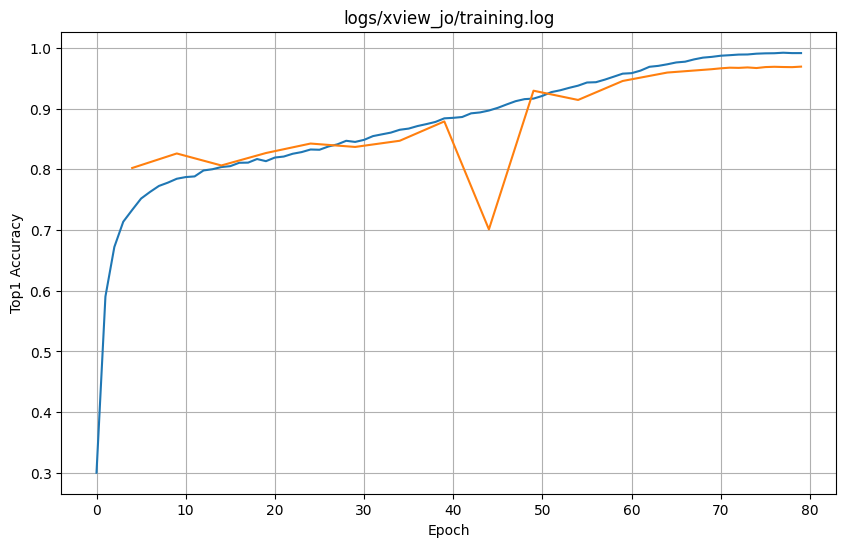

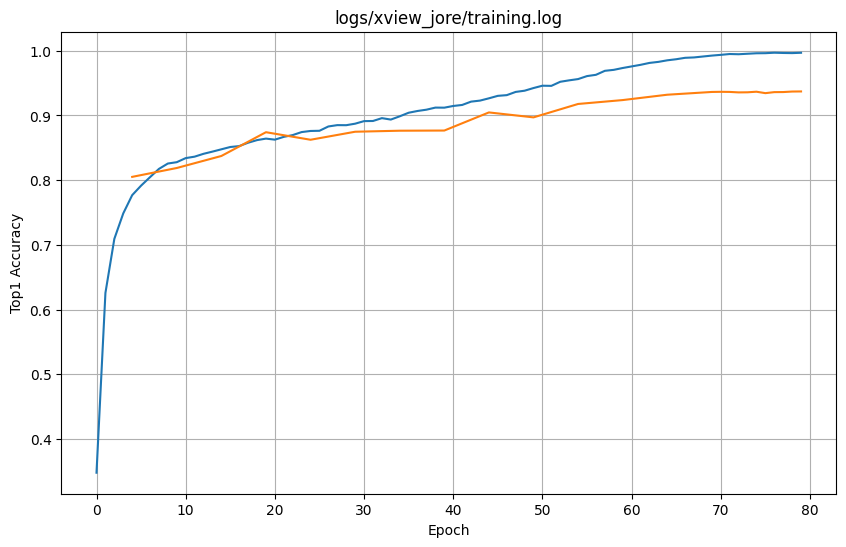

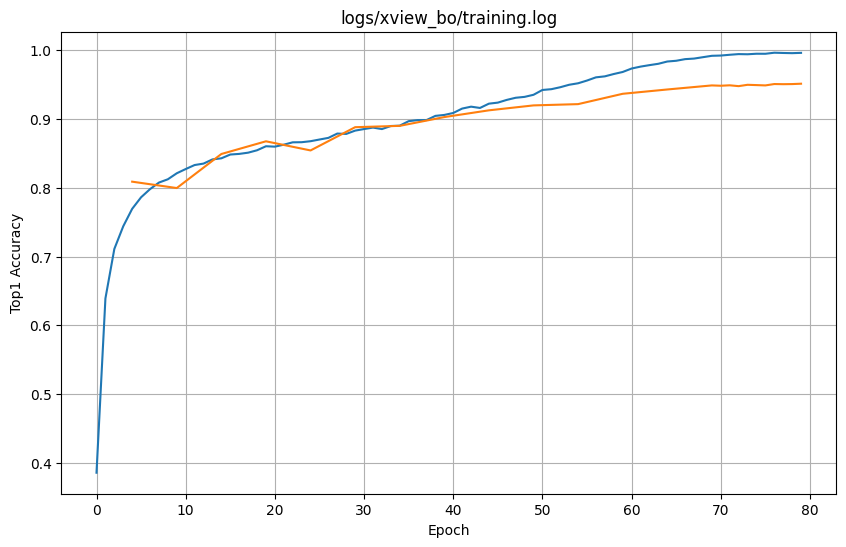

In [8]:
plot_losses("logs/xview_jo/training.log")
plot_losses("logs/xview_jore/training.log")
plot_losses("logs/xview_bo/training.log")

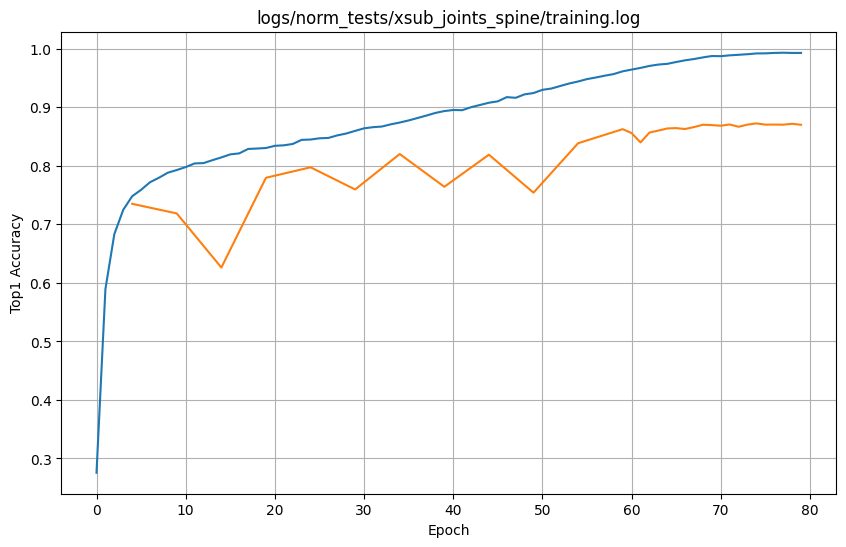

In [9]:
plot_losses("logs/norm_tests/xsub_joints_spine/training.log")

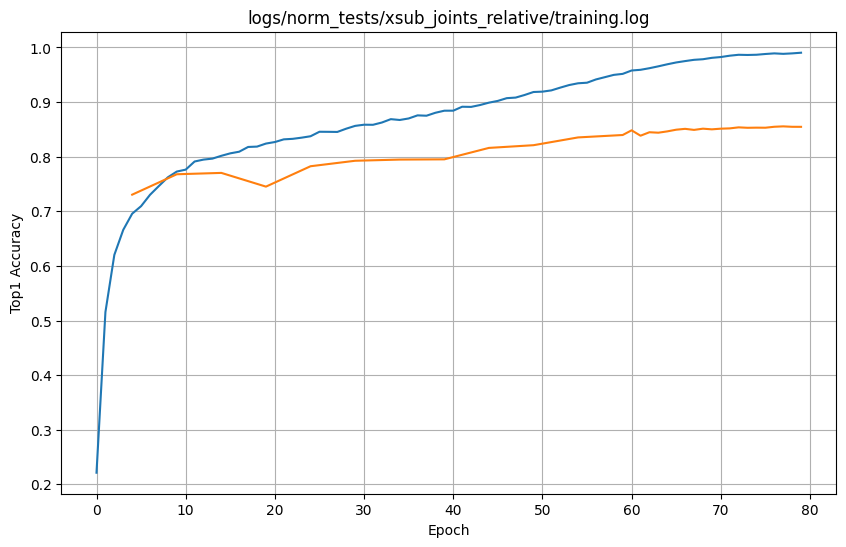

In [10]:
plot_losses("logs/norm_tests/xsub_joints_relative/training.log")

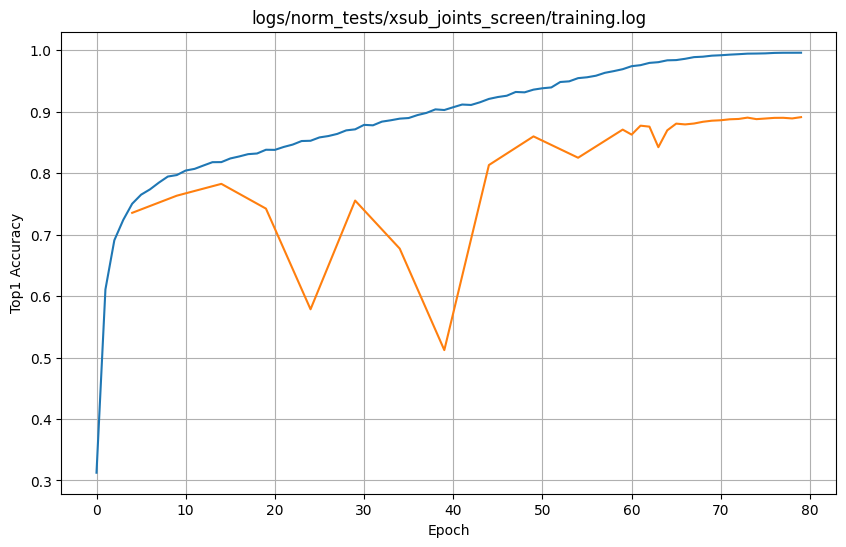

In [11]:
plot_losses("logs/norm_tests/xsub_joints_screen/training.log")

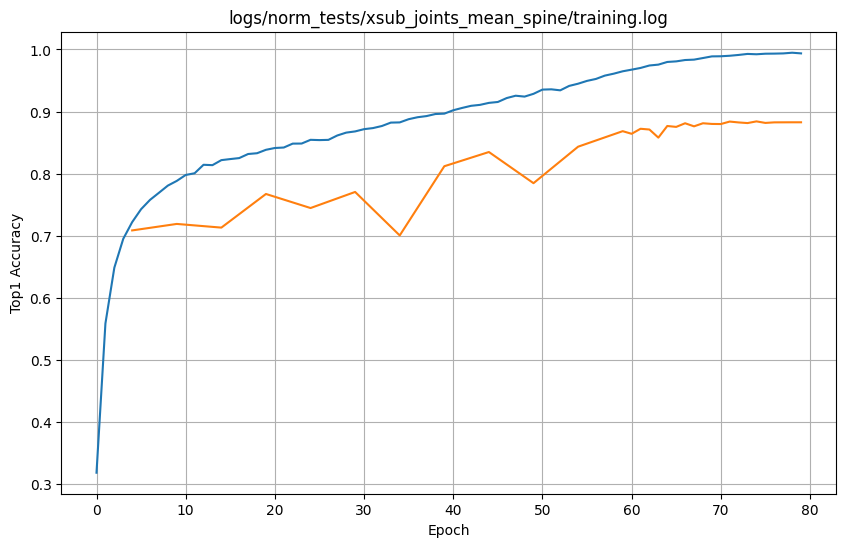

In [12]:
plot_losses("logs/norm_tests/xsub_joints_mean_spine/training.log")